# Lab Week 3

## EOSC 211

### Learning Objectives:

1. Take a real world problem in EOAS and think of it like a scientific programmer
2. Apply our knowledge of *Python* data types, indexing, slicing arrays
3. Use built in functions and imported packages
4. Generate a scientific figure with Matplotlib
5. Reverse-engineer someone else's code to make it work for you

### Intro

In this lab we will apply our knowledge of *numpy arrays* to work with some real oceanographic data, as well as  generate a *scientific figure* using Python's *Matplotlib* library. Presenting your data with clear, concise, visually appealing figures is an exercise we will continually re-visit in this course, and will prove to be a useful skill throughout your career in EOAS. Below is a handy guide for creating excellent figures (also in the marking rubric for this and future labs)

<div class="alert alert-block alert-info">
<b>Scientific Figure Checklist:</b> 

- [ ] Title (Short and sweet is best)
- [ ] Axes labels with units (Don't forget the units!)
- [ ] Legend (Or anything that helps interpret the information presented)
- [ ] Does the figure *make sense* just by looking at it? The data should be clear without referencing anything outside the figure
- [ ] Does it *look good*? (Do the colors clash? does it look crowded/messy?)
</div>

This lab is comprised of two sections: **1)** a tutorial for processing data with Python, Jupyter Notebooks, and creating a scientific figure with Matplotlib, and **2)** a set of instructions for creating your own figure which you will hand in. It is highly recommended that you work through the tutorial **before** attempting the assignment, as it covers a few concepts we have not specifically addressed in lecture yet, and which are essential for earning full marks on the lab assignment.

## Section 1: Plot West Coast Bathymetry Data

In this tutorial, we will import a dataset as a *numpy* array and plot it using *matplotlib.* To keep things neat and organized, we will break the process down into the following steps:

1) Import required packages

2) Import raw data

3) Process the data

4) Display our results


### 1) Import Packages

It's good practice to import all the packages you'll need (on top of Python's core *built-in functions*) in a cell near the top of your notebook. So far we know we will be dealing with *numpy arrays* and making plots, so lets import Numpy and Matplotlib. There are a few different syntaxes for importing packages, demonstrated below:

In [1]:
from e211_lib import e211 # get all the packages from the e211 library (developed specifically for this course)
import numpy as np # get all the packages associated with numpy, and assign numpy a nickname 'np'
import matplotlib.pyplot as plt # get just the package called 'pyplot' from the matplotlib library, nicknamed 'plt'

These are all the dependencies we will need to complete this lab. If we decide later that we want to use something else, we can always add to this cell and re-run it.  

###  2) Import Raw Data

The data we wish to analyze is stored in memory at ```path/to/data/in/container/Bathyfile.mat```. *Bathymetry* refers to information about the depth of the ocean and the height of landmasses. We can use this path (just like in last week's tutorial) to access the data. The next thing to notice is that the file ends with `.mat`, which is the file extension used with data generated in MATLAB. We will need a extra package to read this type of file into something we can analyze with a Jupyter Notebook. Lucky for us, there is something exactly like this in the **e211** library; a function which reads `.mat` files and turns them into numpy arrays!

In [2]:
raw_bathdata = e211.load_mat("Bathyfile.mat")

# what is the data type of the new variable we just created?
type(raw_bathdata)

numpy.ndarray

Now that we have the data in a format we can use, let's explore! We can use built in functions to find out more things than just the data type:

In [3]:
np.shape(raw_bathdata) # how big is the array?

(391, 1201)

In [4]:
np.min(raw_bathdata) # what is the deepest point? (units are in m above/below sea level)

-5243

Let's make a "quick and dirty" plot as a preliminary way to visualize our data (especially since we changed the format, it is a good idea to check if anything went awry). This is just a quick check, we will worry about making it into a proper scientific figure later on. Since this is a 2D dataset (look at the cell where we found *np.shape* of the data), we can use the `contourf()` function from matplotlib.

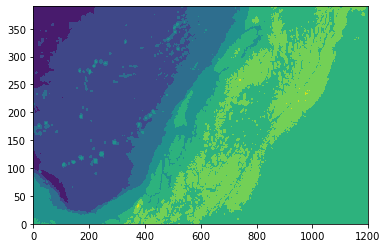

In [5]:
plt.contourf(raw_bathdata);

We have successfully imported the .mat data as an array, but something is clearly wrong. This is supposed to be geographical information of BC and the Pacific Ocean. Can you recognize Vancouver Island? the Gulf of Alaska? The Rocky Mountains? What has happened here and how might we fix it?

### Process The Data

This step is also commonly referred to as "data scrubbing," and is often the longest step (about 80% of our time, according to [a source](https://www.datascienceatthecommandline.com/1e/chapter-1-introduction.html)) while working with a dataset. At this stage we can change the format, get rid of erroneous or extraneous data, combine/compare datasets, add labels to things, but it is important not to *alter* our data in a way that will compromise its *integrity*, which might lead us to make false conclusions from our information. 

First we need to flip our array over. We can do this using our knowledge of array slicing! Remember, the syntax for accessing elements in an array is `[start:stop:step]`.

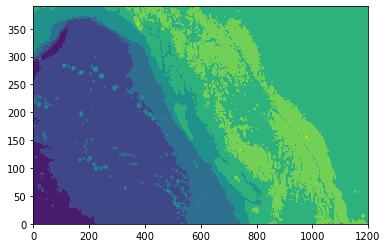

In [6]:
bathdata_fixed = raw_bathdata[::-1]# flip the array over and assign it to a new variable
plt.contourf(bathdata_fixed); # try another quick visualization

Much better! Now let's think about generating a way to label our X and Y axes with something meaningful. Currently, the labels refer to the *array index* of each point on our plot. A far more useful reference would be the latitude (on the y axis) and longitude (on the x axis). This particular image is from latitude 47$^o$ to 60$^o$ N and longitude -150$^o$ to -110 $^o$E. The following code generates arrays that with the lat and lon of each row and column in the image, then passes those into the `contourf` function, which then creates the plot with the new labels applied. Take a second to understand what is happening at each line of code. You may want to try running in a cell `help()` with the name of a built-in function for more information on how that function works.

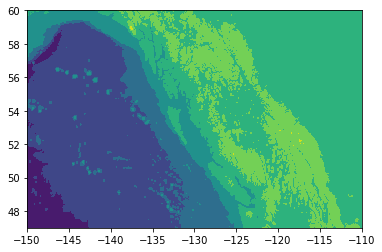

In [7]:
latlen = np.shape(bathdata_fixed)[0] # assign the height and width of the image to new variables
lonlen = np.shape(bathdata_fixed)[1]

lats = np.linspace(47, 60, latlen) # create arrays for lat and lon
lons = np.linspace(-150, -110, lonlen)

# plot it again!
plt.contourf(lons, lats, bathdata_fixed);

Maybe we are only interested in the bathymetry near Vancouver Island. We can "zoom" in on a particular area, using slicing to select a section of the original array. **IMPORTANT:** We need to slice the `lats` and `lons` arrays at the same intervals *before* we try to re-create the plot, or else we will get an error.

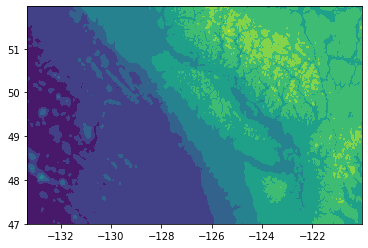

In [8]:
bath_zoomed = bathdata_fixed[0:150,500:900]
lats_zoomed = lats[0:150]
lons_zoomed = lons[500:900] # make sure the slices match between the coordinates and the original data

plt.contourf(lons_zoomed, lats_zoomed, bath_zoomed);

### Display the Results

If we ara satisfied with our data processing, it is now time to present our result with a scientific figure. Go through the checklist and add code to our plot until we tick all of the boxes.

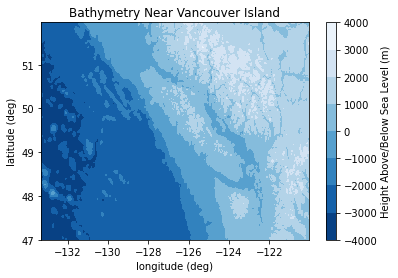

In [9]:
con = plt.contourf(lons_zoomed, lats_zoomed, bath_zoomed, cmap="Blues_r") # change the colormap to something suitable
plt.title("Bathymetry Near Vancouver Island")
plt.xlabel("longitude (deg)")
plt.ylabel("latitude (deg)")

# create a colorbar with labels to show the numerical values corresponding to each color
plt.colorbar(con, label="Height Above/Below Sea Level (m)");

Go through our checklist:
    
- [x] Title 
- [x] Axes labels with units
- [x] Legend - yes, the colorbar is similar to a legend, and we included units!
- [x] Does the figure *make sense* just by looking at it? - look at the colormap we chose: dark blue for deep ocean and white for snowy mountains. This makes the figure *visually intuitive*
- [x] Does it *look good*? 

For changing the colormap, check out the [Matplotlib Documentation](https://matplotlib.org/stable/gallery/color/colormap_reference.html) for a list to choose from. Try inserting the names of other colormaps in place of "Blues_r" and see what happens. Note you can add "_r" to the end of any of cmap name to reverse it. 

Finally, as a last step, restart the kernel and re-run the whole notebook to check for errors (click the $\blacktriangleright\blacktriangleright$ button on the toolbar). This is important, so that the next time you run your notebook (or someone else, perhaps the person marking it), you know you will get the same result that you have now.

## Section 2: Mapping Chlorophyl in the Ocean

In the `/lab_week3` folder, there is a dataset called `chlorophyl_apr2021.png`, which shows the concentration of chlorphyl (mg/m$^3$) in the ocean from satellite imagery, averaged over the month of April in 2021. The data originally came from 
NASA's Earth Observing System Data and Information System (EOSDIS), which can be found at [this website](https://oceancolor.gsfc.nasa.gov/).
 Your task is to go through much the sama analysis as we did in the tutorial: import data into a Jupyter Notebook, scrub it, and use it to generate a scientific figure.


### To be handed in:

1) Create a notebook called `lab_week3_firstname_lastname.ipynb` with your first name and last name. Make sure to comment your code using either *markdown cells* or *in-code comments* starting with the # symbol.

2) Import the dataset as a numpy array. In the `e211` library, there is a function called `e211.load_oceancolor()` which will likely prove useful.

3) Scrub your dataset, correcting any errors and adding an appropriate coordinate system. (**Note**: on the whole globe, latitude runs from 90$^o$ (north pole) to -90 (south pole) with 0$^o$ at the equator and longitude from -180$^o$ to 180$^o$ with the 0$^o$ meridian passing through Greenwich, UK)

4) Zoom in on some place of interest. Where you go is totally up to you, but try to include a recognizable land feature in your plot.

5) Present your data, making sure to meet all the requirements for a scientific figure. Use a colormap other than the default.

6) Final check: run your whole notebook again and check for errors using the $\blacktriangleright\blacktriangleright$ button.

## Lab Solution:

In [10]:
##### import packages ######

from e211_lib import e211
import numpy as np 
import matplotlib.pyplot as plt

In [11]:
##### import raw data #####

chlor = e211.load_oceancolor("chlorophyl_apr2021.png")
#plt.contourf(chlor)

In [12]:
##### scrub data #####

# create arrays to show latitude and longitude as the labels
num_lats = chlor.shape[0]
num_lons = chlor.shape[1]
chlor_fixed = chlor[::-1]  # flip the array over vertically

# create the lat array, with the same number of elements as chlor has rows
lats = np.linspace(-90, 90, num_lats)
# create the lon array, with the same number of elements as chlor has cols
lons = np.linspace(-180, 180, num_lons)  

# zoom in on PNW by slicing all 3 arrays
hmin = 2500
hmax = 3700
wmin = 0
wmax = 2000

chlor_zoomed = chlor_fixed[hmin:hmax,wmin:wmax]
lats_zoomed = lats[hmin:hmax]
lons_zoomed = lons[wmin:wmax]

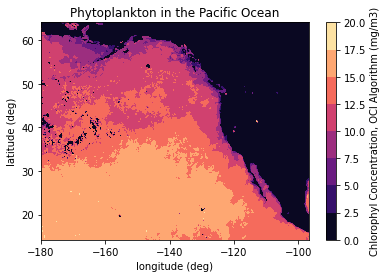

In [13]:
##### make a scientific figure #####

con = plt.contourf(lons_zoomed, lats_zoomed, chlor_zoomed, cmap="magma")
plt.colorbar(con, label="Chlorophyl Concentration, OCI Algorithm (mg/m3)")
plt.title("Phytoplankton in the Pacific Ocean")
plt.xlabel("longitude (deg)")
plt.ylabel("latitude (deg)");

## $\downarrow$$\downarrow$$\downarrow$ Extra Code Scraps Made While Writing this lab $\downarrow$$\downarrow$$\downarrow$

## Exercise 1: Visualize some oceanographic data from the web

get data from here https://oceancolor.gsfc.nasa.gov

link -> data -> level 3 browser -> drop down settings to "standard", "<any>", <any>", "monthly", "9km" -> right click -> save image as -> name it something sensible and save in working directory
    
mine is at `C:\Users\Owner\UBC_TLEF\eosc_211\e211_python_2021\wk03\lab_wk3\chlorophyl_march1999.png`

Import the packages we need (explain what each one does)

In [14]:
# Import the necessary libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

import our data as a .png image

In [15]:
# load the image
chlordat_in = Image.open("chlorophyl_march1999.png")

# what type of data are we dealing with? use the built in function type()
type(chlordat_in)

PIL.PngImagePlugin.PngImageFile

png is a common image format, but we would like to do more than just look at the picture. Convert to numpy so we can do analyze our data and generate a proper *scientific figure* to present our results.

In [16]:
chlordat_arr = np.asarray(chlordat_in)

# now what is the data type?
type(chlordat_arr)
chlordat_arr.dtype

dtype('uint8')

In [17]:
# cool, we made it into a numpy array. What are its dimensions?
np.shape(chlordat_arr)

(2160, 4320)

What are the *values* stored in our array? chlorophyl concentrations from 0 - 20 mg/m3 are mapped to integers from 255 to 0. Discuss further as in the old lab

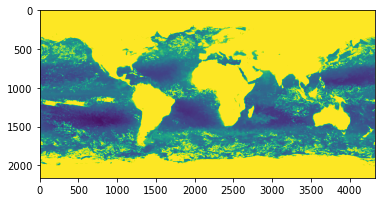

In [18]:
pcm = plt.imshow(chlordat_arr,origin='upper')

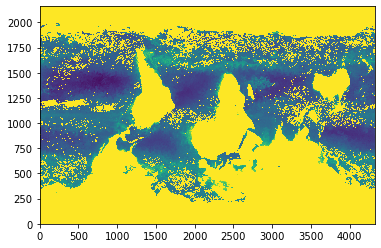

In [19]:
# lets try plotting our array as a pcolormesh (a common way to visualize 2D datasets or images)
pcm = plt.pcolormesh(chlordat_arr)

Okay, we seem to have the general features of our data, but something has gone awry converting from a 
png to an array. How can we fix this given what we know about *array slicing?*

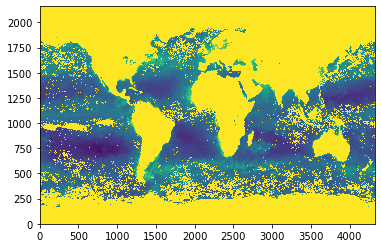

In [20]:
chlordat_fixed = chlordat_arr[::-1,::]  # explain what this does, or get students to come up with this

# try plotting it again
pcm = plt.pcolormesh(chlordat_fixed)

Looking better, but the default colours hurt to look at and it's very hard to understand what this picture actually represents. We can look at the available *parameters* ( ways we can modify the figure) for a *pcolormesh* plot by doing

In [21]:
help(plt.pcolormesh)

Help on function pcolormesh in module matplotlib.pyplot:

pcolormesh(*args, alpha=None, norm=None, cmap=None, vmin=None, vmax=None, shading=None, antialiased=False, data=None, **kwargs)
    Create a pseudocolor plot with a non-regular rectangular grid.
    
    Call signature::
    
        pcolormesh([X, Y,] C, **kwargs)
    
    *X* and *Y* can be used to specify the corners of the quadrilaterals.
    
    .. hint::
    
       `~.Axes.pcolormesh` is similar to `~.Axes.pcolor`. It is much faster
       and preferred in most cases. For a detailed discussion on the
       differences see :ref:`Differences between pcolor() and pcolormesh()
       <differences-pcolor-pcolormesh>`.
    
    Parameters
    ----------
    C : 2D array-like
        The color-mapped values.
    
    X, Y : array-like, optional
        The coordinates of the corners of quadrilaterals of a pcolormesh::
    
            (X[i+1, j], Y[i+1, j])       (X[i+1, j+1], Y[i+1, j+1])
                                  +--

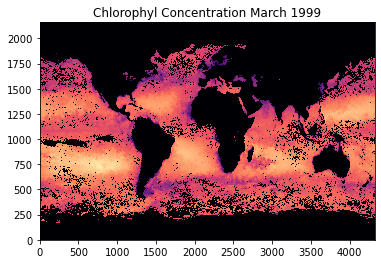

In [22]:
pcm = plt.pcolormesh(chlordat_fixed, cmap='magma_r') # change the colormap with a keyword argument
plt.title("Chlorophyl Concentration March 1999"); # add a title to the figure

Here is a link to the [matplotlib documentation](https://matplotlib.org/stable/gallery/color/colormap_reference.html) where I got the `magma_r` colormap from (you can add `_r` to any color map to reverse it). 

Next: change the x and y labels to something something meaningful, like latitude and longitude.

In [23]:
help(plt.xticks)

Help on function xticks in module matplotlib.pyplot:

xticks(ticks=None, labels=None, **kwargs)
    Get or set the current tick locations and labels of the x-axis.
    
    Pass no arguments to return the current values without modifying them.
    
    Parameters
    ----------
    ticks : array-like, optional
        The list of xtick locations.  Passing an empty list removes all xticks.
    labels : array-like, optional
        The labels to place at the given *ticks* locations.  This argument can
        only be passed if *ticks* is passed as well.
    **kwargs
        `.Text` properties can be used to control the appearance of the labels.
    
    Returns
    -------
    locs
        The list of xtick locations.
    labels
        The list of xlabel `.Text` objects.
    
    Notes
    -----
    Calling this function with no arguments (e.g. ``xticks()``) is the pyplot
    equivalent of calling `~.Axes.get_xticks` and `~.Axes.get_xticklabels` on
    the current axes.
    Calling this

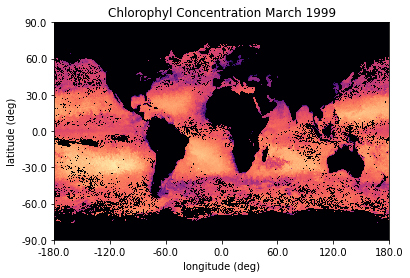

In [24]:
# We'd like to label every 30 degrees and place them in the correct location on our image.
# Use our skills at creating, indexing and slicing numpy arrays to create "ticks" and "labels"

numlats = np.shape(chlordat_fixed)[0]  # how many latitude elements in the original image?
numlons = np.shape(chlordat_fixed)[1]  # how many longitude elements?

# create arrays to use as "ticks"
lat_ticks = np.linspace(0, numlats, 7) # what am i doing here?
lon_ticks = np.linspace(0, numlons, 7)

# create arrays to use as "labels"
lat_labels = np.linspace(-90, 90, 7)  # start, stop, number of elements
lon_labels = np.linspace(-180, 180, 7)


# plot it again with lat, lon ticks and labels
pcm = plt.pcolormesh(chlordat_fixed, cmap="magma_r")  # change the colormap with a keyword argument
plt.title("Chlorophyl Concentration March 1999")  # add a title to the figure
plt.xlabel("longitude (deg)")
plt.ylabel("latitude (deg)")
plt.xticks(lon_ticks, lon_labels)
plt.yticks(lat_ticks, lat_labels);

Add a colourbar so we can interpret our data, just like the one on the oceancolor website.

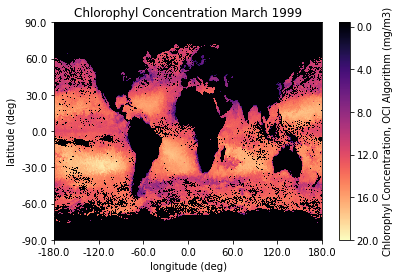

In [25]:
pcm = plt.pcolormesh(chlordat_fixed, cmap="magma_r")
plt.title("Chlorophyl Concentration March 1999")  # add a title to the figure
plt.xlabel("longitude (deg)")
plt.ylabel("latitude (deg)")
plt.xticks(lon_ticks, lon_labels)
plt.yticks(lat_ticks, lat_labels)

# create the colorbar. ticks and labels are assigned much the same as with axis labels
cbar = plt.colorbar(pcm, ticks=np.linspace(250,0,6), label="Chlorophyl Concentration, OCI Algorithm (mg/m3)")
cbar.ax.set_yticklabels(np.linspace(0,20,6));

Go through our scientific figure checklist. This checks all the boxes. 9 lines of code to produce the plot. It might be a good idea to save this code somewhere to use as a reference for the next time you need to generate a scientific figure.

## Exercise 2: Bathymetry

The old lab talks about processing unscaled vs scaled data, but we just did a ton of work to rescale our labels in question 1. Whats easy in matlab is hard in python and v.v?


Same idea as #1: get data, re-format it into something we can understand and parse with python, manipulate the data however we wish, then present the result in a concise, nicely formatted way.

This dataset is from old MATLAB code, which saves data using the `.mat` extension. A quick search shows that there is a python package called `loadmat` from the scipy library that will handle this file type

In [26]:
# import tools we need to process the new data type
from scipy.io import loadmat

help(loadmat)

Help on function loadmat in module scipy.io.matlab.mio:

loadmat(file_name, mdict=None, appendmat=True, **kwargs)
    Load MATLAB file.
    
    Parameters
    ----------
    file_name : str
       Name of the mat file (do not need .mat extension if
       appendmat==True). Can also pass open file-like object.
    mdict : dict, optional
        Dictionary in which to insert matfile variables.
    appendmat : bool, optional
       True to append the .mat extension to the end of the given
       filename, if not already present.
    byte_order : str or None, optional
       None by default, implying byte order guessed from mat
       file. Otherwise can be one of ('native', '=', 'little', '<',
       'BIG', '>').
    mat_dtype : bool, optional
       If True, return arrays in same dtype as would be loaded into
       MATLAB (instead of the dtype with which they are saved).
    squeeze_me : bool, optional
       Whether to squeeze unit matrix dimensions or not.
    chars_as_strings : bool

(47.0, 60.0)

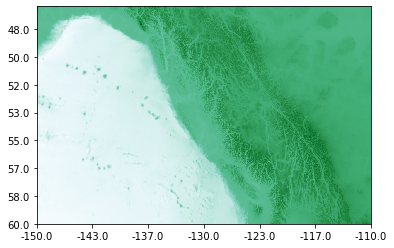

In [27]:
# get data
bathyfile = loadmat("Bathyfile.mat")

# format data into something we can use
# loadmat outputs a dictionary of np arrays. This code extracts the dictionary values to variables
lon = bathyfile["bath"][0][0][0].flatten() # extract latitude array
lat = bathyfile["bath"][0][0][1].flatten() # extract longitude array
height = bathyfile["bath"][0][0][2]
height = height[::-1] # flip it over as with q1

# present data
pcm = plt.pcolormesh(height,cmap='BuGn')
plt.xticks(np.arange(len(lon))[::200], np.round(lon)[::200])
plt.yticks(np.arange(len(lat))[::50], np.round(lat)[::50]);

min(lat), max(lat)

## Exercise 3: 

Create a scientific figure! You will need to use

In [28]:
from e211_lib import e211

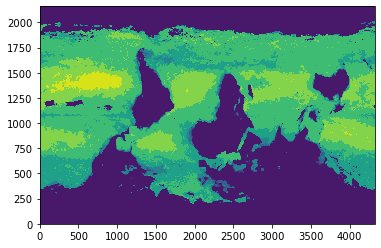

In [29]:
# load the image and do a "quick and dirty" plot
chlor = e211.load_oceancolor("chlorophyl_march1999.png")
plt.contourf(chlor)

In [30]:
# query the size of the numpy array
chlor.shape

(2160, 4320)

Text(0, 0.5, 'latitude (deg)')

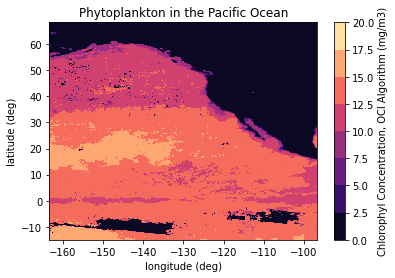

In [31]:
## create arrays to show latitude and longitude as the labels
num_lats = chlor.shape[0]
num_lons = chlor.shape[1]
chlor_fixed = chlor[::-1]  # flip the array over vertically

# create the lat array, with the same number of elements as chlor has rows
lats = np.linspace(-90, 90, num_lats)
# create the lon array, with the same number of elements as chlor has cols
lons = np.linspace(-180, 180, num_lons)  

# zoom in on PNW by slicing all 3 arrays
hmin = 900
hmax = 1900
wmin = 200
wmax = 1000

chlor_zoomed = chlor_fixed[hmin:hmax,wmin:wmax]
lats_zoomed = lats[hmin:hmax]
lons_zoomed = lons[wmin:wmax]

# try the plot again
con = plt.contourf(lons_zoomed, lats_zoomed, chlor_zoomed, cmap="magma")
plt.colorbar(con, label="Chlorophyl Concentration, OCI Algorithm (mg/m3)")
plt.title("Phytoplankton in the Pacific Ocean")
plt.xlabel("longitude (deg)")
plt.ylabel("latitude (deg)")